In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,KFold

In [35]:
data = pd.read_csv("diabetes.CSV",dtype='float')   #dtype='float'

In [36]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0


In [37]:
x = data.iloc[:,:8].values
y = data.iloc[:,8].values

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
svcl=SVC(C=1,kernel="linear")


In [40]:
svcl.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [41]:
print(svcl)

SVC(C=1, kernel='linear')


In [42]:
#classifier = svm.SVC(kernel='linear')

In [43]:
y_pred = svcl.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred)

0.8181818181818182

In [45]:
confusion_matrix(y_test,y_pred)

array([[97, 10],
       [18, 29]], dtype=int64)

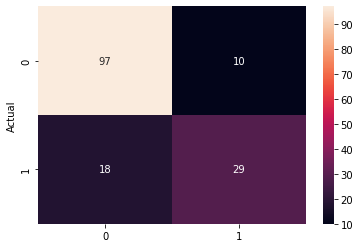

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.ylabel("Actual")
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [48]:
params = {"C":[0.2,0.5]}
cval = KFold(n_splits=2)
model = SVC()
gsearch = GridSearchCV(model,params,cv=cval)

In [49]:
gsearch.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=SVC(), param_grid={'C': [0.2, 0.5]})

In [50]:
gsearch.best_params_

{'C': 0.5}

In [51]:
arr = np.array([6,148,72,35,0,33.6,0.627,50]).reshape(1,8)
arr
#arr=np.array(6,148,72,35,0,33.6,0.627,50).reshape(0,7)
#print(arr)

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]])

In [52]:
finalOutput = svcl.predict(arr)

In [53]:
print(finalOutput)

if (finalOutput == 1):
    print('The person is diabetic.')
else :
    print('The person is not diabetic.')

[1.]
The person is diabetic.


In [54]:
## saving the trained model
import pickle

In [55]:
filename = 'trained_model.sav'
pickle.dump(svcl, open(filename, 'wb'))

In [56]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav' , 'rb'))

In [57]:
####DILANKA ADDED

arr = np.array([6,148,72,35,0,33.6,0.627,50]).reshape(1,8)
arr
#arr=np.array(6,148,72,35,0,33.6,0.627,50).reshape(0,7)
#print(arr)
finalOutput = loaded_model.predict(arr)
print(finalOutput)

if (finalOutput == 1):
    print('The person is diabetic.')
else :
    print('The person is not diabetic.')

[1.]
The person is diabetic.


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA